<a href="https://colab.research.google.com/github/Pyeonseohee/Deeplearning/blob/main/DataScience_Post_Covid19_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# POST - COVID19 데이터 시각화 경진대회

* 가설 1: 코로나 이후 배달이 급격히 늘어 배달완료시간이 오래 걸릴 것이다.

필요한 library 불러오기기

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import datetime
import matplotlib.pyplot as plt

google drive mount 해준 뒤, delivery.csv 파일 읽기 head() 함수는 파일 간단히 보여줌.

In [2]:
delivery = pd.read_csv('/content/drive/MyDrive/Post_Covid19/delivery.csv')
delivery.head()

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,DLVR_STORE_DONG,DLVR_STORE_RI,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_SIDO,DLVR_DSTN_SIGUNGU,DLVR_DSTN_DONG,DLVR_DSTN_RI,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,4812710600,경상남도,창원시 마산회원구,합성동,NaN,4812759000,4.812748e+11,4.812710e+09,경상남도,창원시 마산회원구,석전동,NaN,4.812754e+09,4.812748e+11,D0005271,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NaN
1,4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,철산동,NaN,4121061000,4.121030e+11,1.154510e+09,서울특별시,금천구,가산동,NaN,1.154551e+09,1.154531e+11,D0003269,4800,200,49000,2,NaN,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NaN
2,4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,갈현동,NaN,1138055100,1.138041e+11,1.138010e+09,서울특별시,은평구,갈현동,NaN,1.138055e+09,1.138041e+11,D0001536,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NaN
3,4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,의정부동,NaN,4115051000,4.115043e+11,4.115010e+09,경기도,의정부시,의정부동,NaN,4.115051e+09,4.115043e+11,D0005061,4500,300,20000,2,NaN,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NaN
4,4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,행신동,NaN,4128164000,4.128144e+11,4.128110e+09,경기도,고양시 덕양구,주교동,NaN,4.128151e+09,4.128144e+11,D0005215,6500,300,32000,2,NaN,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NaN


* SERIAL_NUMBER : 순번
* PROCESS_DT : 처리일시
* DLVR_RQESTER_ID : 배달요청업체 ID
* DLVR_REQUST_STTUS_VALUE : 배달요청상태값( 1:완료, 2:취소, 3:사고, 4:문의)
* DLVR_RCEPT_CMPNY_ID : 배달접수회사 ID
* DLVR_STORE_ID : 배달상점 ID
* DLVR_STORE_INDUTY_NM : 배달상점 업종이름
* DLVR_STORE_LEGALDONG_CODE : 배달상점 주소 법정동코드
* DLVR_STORE_SIDO : 배달상점 주소 법정동 시도명
* DLVR_STORE_SIGUNGU : 배달상점 주소 법정동 시군구명
* DLVR_STORE_DONG : 배달상점 주소 법정동 읍면동명
* DLVR_STORE_RI : 배달상점 주소 법정동 리명
* DLVR_STORE_ADSTRD_CODE : 배달상점 주소 행정동 코드
* DLVR_STORE_RDNMADR_CODE : 배달상점주소 도로명주소 코드
* DLVR_DSTN_LEGALCONG_CODE : 배달목적지 주소 법정동코드
* DLVR_DSTN_SIDO : 배달목적지 주소 법정동 시도명
* DLVR_DSTN_SIGUNGU : 배달목적지 주소 법정동 시군구명
* DLVR_DSTN_DONG : 배달목적지 주소 법정동 읍면동명
* DLVR_DSTN_RI : 배달목적지 주소 법정동 리명
* DLVR_DSTN_ADSTRD_CODE: 배달목적지 주소 행정동 코드
* DLVR_DSTN_RDNMADR_CODE : 배달목적지주소 도로명주소 코드
* DLVR_MAN_ID : 배달기사 ID
* DLVR_AMOUNT : 배달비용
* CALL_RLAY_FEE_AMOUNT : 호출중계수수료금액
* GOODS_AMOUNT : 배달상품금액
* SETLE_KND_VALUE : 결제종류번호 (1:카드, 2:선불, 3:현금)
* SETLE_CARD_CN : 결제카드종류
* DLVR_RCEPT_TIME : 배달접수시간
* DLVR_CARALC_TIME : 배달배차시간
* DLVR_COMPT_TIME : 배달완료시간
* DLVR_CANCL_TIME : 배달취소시간

delivery의 'DLVR_RCEPT_TIME', 'DLVR_COMPT_TIME', 'PROCESS_DT'의 type 확인

In [3]:
type(delivery['DLVR_RCEPT_TIME'][0])

str

In [4]:
type(delivery['DLVR_COMPT_TIME'][0])

str

In [5]:
type(delivery['PROCESS_DT'][0])

str

datatime type으로 바꿔주기

In [6]:
delivery['DLVR_RCEPT_TIME'] = pd.to_datetime(delivery['DLVR_RCEPT_TIME'])
delivery['DLVR_COMPT_TIME'] = pd.to_datetime(delivery['DLVR_COMPT_TIME'])
delivery['PROCESS_DT'] = pd.to_datetime(delivery['PROCESS_DT'])

바뀐 type 확인

In [7]:
type(delivery['DLVR_RCEPT_TIME'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
type(delivery['DLVR_COMPT_TIME'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
type(delivery['PROCESS_DT'][0])

pandas._libs.tslibs.timestamps.Timestamp

배달시간 계산

In [10]:
time = Series(delivery['DLVR_COMPT_TIME'] - delivery['DLVR_RCEPT_TIME'], dtype = 'object')
time

0          0 days 00:25:48
1          0 days 00:19:30
2          0 days 00:17:33
3          0 days 00:35:14
4          0 days 00:23:54
                ...       
5158319    0 days 00:19:25
5158320    0 days 00:21:05
5158321    0 days 00:19:37
5158322    0 days 00:14:32
5158323    0 days 00:23:32
Length: 5158324, dtype: object

time의 value 값들만 확인

In [11]:
time.values

array([Timedelta('0 days 00:25:48'), Timedelta('0 days 00:19:30'),
       Timedelta('0 days 00:17:33'), ..., Timedelta('0 days 00:19:37'),
       Timedelta('0 days 00:14:32'), Timedelta('0 days 00:23:32')],
      dtype=object)

In [12]:
type(time.values[0])

pandas._libs.tslibs.timedeltas.Timedelta

time을 계산하기 위해 초로 바꾸기

In [13]:
time.values[1].seconds

1170

second 리스트에 값 저장하기

In [14]:
second = []
for i in range(len(time.values)):
  s = time.values[i].seconds
  second.append(s)
second[:10]
len(second)

5158324

In [15]:
second = pd.Series(second)
second[:3] #간단히 보기 위해 3개만 출력

0    1548.0
1    1170.0
2    1053.0
dtype: float64

In [16]:
second = DataFrame(second,columns = ['second'])
second.head()

,second
0,1548.0
1,1170.0
2,1053.0
3,2114.0
4,1434.0


delivery dataframe과 second dataframe 결합.

In [17]:
df = pd.merge(delivery, second, left_index = True, right_index = True)
df.head(10)

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,DLVR_STORE_DONG,DLVR_STORE_RI,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_SIDO,DLVR_DSTN_SIGUNGU,DLVR_DSTN_DONG,DLVR_DSTN_RI,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,second
0,4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,4812710600,경상남도,창원시 마산회원구,합성동,NaN,4812759000,4.812748e+11,4.812710e+09,경상남도,창원시 마산회원구,석전동,NaN,4.812754e+09,4.812748e+11,D0005271,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NaN,1548.0
1,4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,철산동,NaN,4121061000,4.121030e+11,1.154510e+09,서울특별시,금천구,가산동,NaN,1.154551e+09,1.154531e+11,D0003269,4800,200,49000,2,NaN,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NaN,1170.0
2,4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,갈현동,NaN,1138055100,1.138041e+11,1.138010e+09,서울특별시,은평구,갈현동,NaN,1.138055e+09,1.138041e+11,D0001536,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NaN,1053.0
3,4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,의정부동,NaN,4115051000,4.115043e+11,4.115010e+09,경기도,의정부시,의정부동,NaN,4.115051e+09,4.115043e+11,D0005061,4500,300,20000,2,NaN,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NaN,2114.0
4,4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,행신동,NaN,4128164000,4.128144e+11,4.128110e+09,경기도,고양시 덕양구,주교동,NaN,4.128151e+09,4.128144e+11,D0005215,6500,300,32000,2,NaN,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NaN,1434.0
5,4577993,2020-01-01,C000238,1,C000238,S0001485,족발/보쌈,4119010800,경기도,부천시,중동,NaN,4119074200,4.119044e+11,4.119010e+09,경기도,부천시,심곡동,NaN,4.119060e+09,4.119030e+11,D0004834,3500,200,37000,1,승인:비씨카드사,2020-01-01 00:59:31,2020-01-01 01:00:30,2020-01-01 01:25:41,NaN,1570.0
6,4577994,2020-01-01,C000049,1,C000049,S0022461,분식,1153010800,서울특별시,구로구,오류동,NaN,1153077000,1.153030e+11,1.153011e+09,서울특별시,구로구,궁동,NaN,1.153079e+09,1.153041e+11,D0004461,3800,300,28000,2,NaN,2020-01-01 01:27:00,2020-01-01 01:27:47,2020-01-01 01:41:45,NaN,885.0
7,4577995,2020-01-01,C000238,1,C000238,S0001037,야식,4119010200,경기도,부천시,심곡동,NaN,4119060300,4.119044e+11,4.119011e+09,경기도,부천시,송내동,NaN,4.119075e+09,4.119044e+11,D0004936,3500,200,28500,2,NaN,2020-01-01 00:09:40,2020-01-01 00:17:31,2020-01-01 00:32:24,NaN,1364.0
8,4577996,2020-01-01,C000104,1,C000101,S0021988,치킨,1156013300,서울특별시,영등포구,대림동,NaN,1156070000,1.156042e+11,1.156013e+09,서울특별시,영등포구,신길동,NaN,1.156052e+09,1.156031e+11,D0006259,4800,200,17000,1,승인:KB국민카드,2020-01-01 00:51:49,2020-01-01 00:52:12,2020-01-01 01:23:41,NaN,1912.0
9,4577997,2020-01-01,C000031,1,C000043,S0028777,야식,4115010600,경기도,의정부시,민락동,NaN,4115057800,4.115043e+11,4.115011e+09,경기도,의정부시,낙양동,NaN,4.115058e+09,4.115032e+11,D0000800,3500,300,22000,1,승인:신한카드,2020-01-01 00:10:34,2020-01-01 00:11:10,2020-01-01 00:26:04,NaN,930.0


df dataframe에서 날짜와 지역 기준으로 배달완료 시간 평균내기

In [22]:
group = df.groupby(['PROCESS_DT', 'DLVR_STORE_SIDO'])['second'].mean()
group

PROCESS_DT  DLVR_STORE_SIDO
2020-01-01  강원도                2026.333333
            경기도                1264.739420
            경상남도               1051.631710
            경상북도               1319.161616
            광주광역시               881.095238
                                  ...     
2020-06-21  전라남도                938.386555
            전라북도                970.993269
            제주특별자치도             666.751527
            충청남도                827.296770
            충청북도               1057.130612
Name: second, Length: 2473, dtype: float64

지역 확인하기

In [21]:
df['DLVR_STORE_SIDO'].unique()

array(['경상남도', '경기도', '서울특별시', '전라남도', '대구광역시', '충청남도', '제주특별자치도', '전라북도',
       '경상북도', '인천광역시', '대전광역시', '부산광역시', '충청북도', '광주광역시', '강원도'],
      dtype=object)

Text(0.5, 1.0, 'Delivery Completion Time Of Seoul')

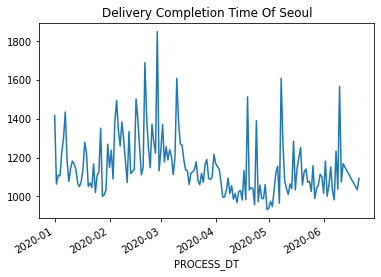

In [31]:
seoul = group[:, '서울특별시']
seoul.plot()
plt.title('Delivery Completion Time Of Seoul')

Text(0.5, 1.0, 'Delivery Completion Time Of Gyeonggido')

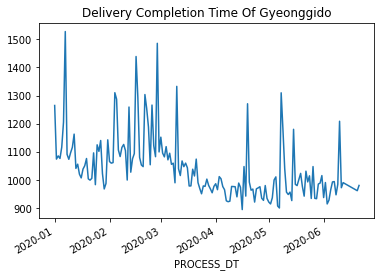

In [32]:
gyeonggido = group[:, '경기도']
gyeonggido.plot()
plt.title('Delivery Completion Time Of Gyeonggido')

Text(0.5, 1.0, 'Delivery Completion Time Of Incheon')

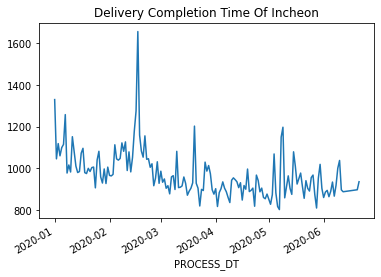

In [33]:
incheon = group[:, '인천광역시']
incheon.plot()
plt.title('Delivery Completion Time Of Incheon')

Text(0.5, 1.0, 'Delivery Completion Time Of Gangwondo')

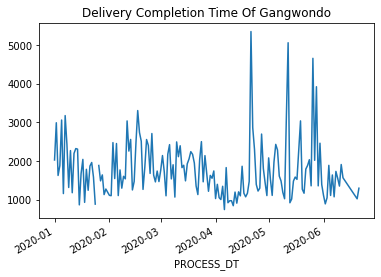

In [34]:
gangwondo = group[:, '강원도']
gangwondo.plot()
plt.title('Delivery Completion Time Of Gangwondo')

Text(0.5, 1.0, 'Delivery Completion Time Of Busan')

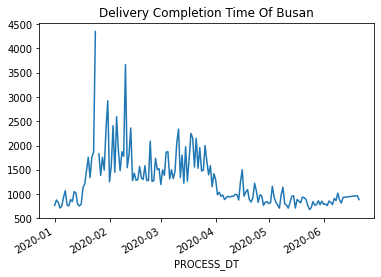

In [35]:
busan = group[:, '부산광역시']
busan.plot()
plt.title('Delivery Completion Time Of Busan')

Text(0.5, 1.0, 'Delivery Completion Time Of Daegu')

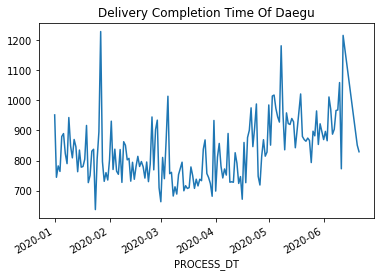

In [36]:
daegu = group[:, '대구광역시']
daegu.plot()
plt.title('Delivery Completion Time Of Daegu')

Text(0.5, 1.0, 'Delivery Completion Time Of Gwangju')

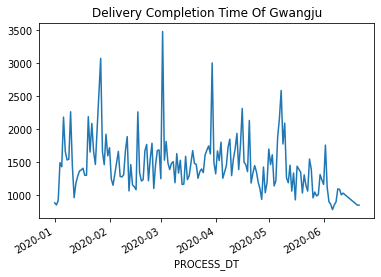

In [37]:
gwangju = group[:, '광주광역시']
gwangju.plot()
plt.title('Delivery Completion Time Of Gwangju')

Text(0.5, 1.0, 'Delivery Completion Time Of Jeju-do')

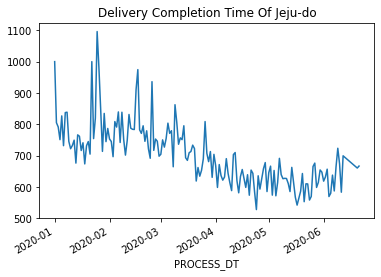

In [38]:
jeju = group[:, '제주특별자치도']
jeju.plot()
plt.title('Delivery Completion Time Of Jeju-do')

df dataframe에서 날짜와 지역 기준으로 delivery amount 뽑기

In [40]:
c = df.groupby(['PROCESS_DT', 'DLVR_STORE_SIDO'])['SERIAL_NUMBER'].count()
c

PROCESS_DT  DLVR_STORE_SIDO
2020-01-01  강원도                   88
            경기도                18168
            경상남도                1634
            경상북도                 413
            광주광역시                212
                               ...  
2020-06-21  전라남도                 486
            전라북도                1062
            제주특별자치도              494
            충청남도                1666
            충청북도                 747
Name: SERIAL_NUMBER, Length: 2473, dtype: int64

Text(0.5, 1.0, 'Delivery amount of Seoul')

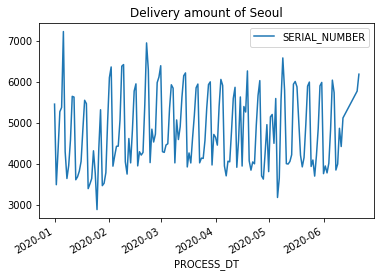

In [49]:
s_c = DataFrame(c[:, '서울특별시'])
s_c.plot()
plt.title('Delivery amount of Seoul')

Text(0.5, 1.0, 'Delivery amount of Incheon')

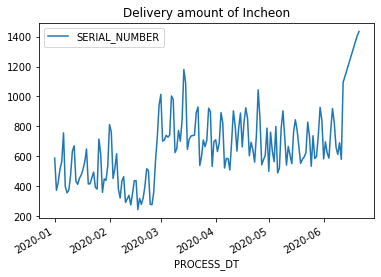

In [50]:
i_c = DataFrame(c[:, '인천광역시'])
i_c.plot()
plt.title('Delivery amount of Incheon')

Text(0.5, 1.0, 'Delivery amount of Gangwondo')

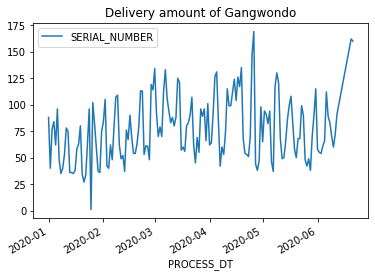

In [51]:
g_c = DataFrame(c[:, '강원도'])
g_c.plot()
plt.title('Delivery amount of Gangwondo')

Text(0.5, 1.0, 'Delivery amount of Busan')

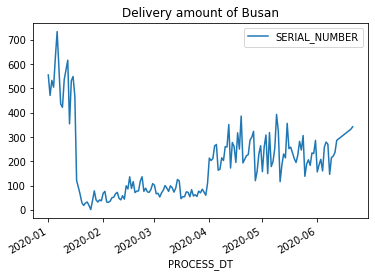

In [52]:
b_c = DataFrame(c[:, '부산광역시'])
b_c.plot()
plt.title('Delivery amount of Busan')

Text(0.5, 1.0, 'Delivery amount of Daegu')

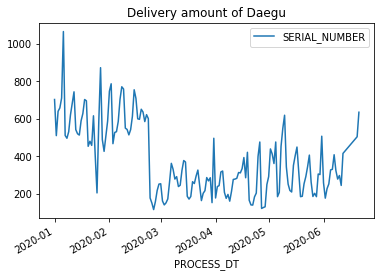

In [54]:
d_c = DataFrame(c[:, '대구광역시'])
d_c.plot()
plt.title('Delivery amount of Daegu')

Text(0.5, 1.0, 'Delivery amount of Gwangju')

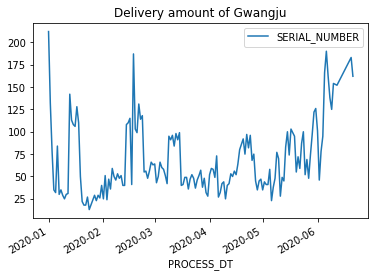

In [55]:
k_c = DataFrame(c[:, '광주광역시'])
k_c.plot()
plt.title('Delivery amount of Gwangju')

Text(0.5, 1.0, 'Delivery amount of Jeju-do')

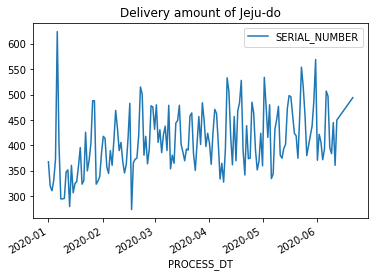

In [56]:
j_c = DataFrame(c[:, '제주특별자치도'])
j_c.plot()
plt.title('Delivery amount of Jeju-do')

delivery amount와 delivery completion time 시각화

Text(0.5, 1.0, 'Delivery of Seoul')

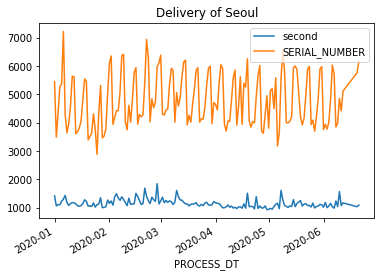

In [57]:
seoul = pd.concat([group[:, '서울특별시'], c[:,'서울특별시']], axis=1)
seoul.plot()
plt.title('Delivery of Seoul')

Text(0.5, 1.0, 'Delivery of Gyeonggido')

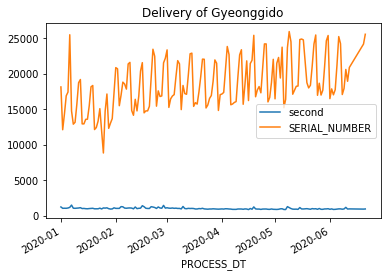

In [62]:
gyeonggido = pd.concat([group[:, '경기도'], c[:,'경기도']], axis=1)
gyeonggido.plot()
plt.title('Delivery of Gyeonggido')

Text(0.5, 1.0, 'Delivery of Incheon')

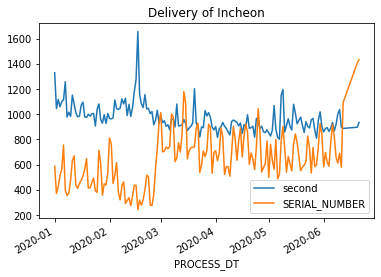

In [58]:
incheon = pd.concat([group[:, '인천광역시'], c[:,'인천광역시']], axis=1)
incheon.plot()
plt.title('Delivery of Incheon')

Text(0.5, 1.0, 'Delivery of Gangwondo')

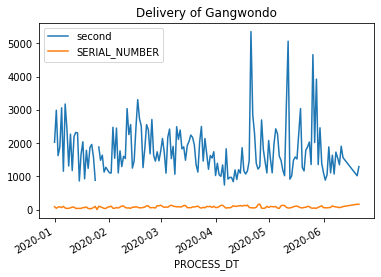

In [70]:
gangwondo = pd.concat([group[:, '강원도'], c[:,'강원도']], axis=1)
gangwondo.plot()
plt.title('Delivery of Gangwondo')

Text(0.5, 1.0, 'Delivery of Busan')

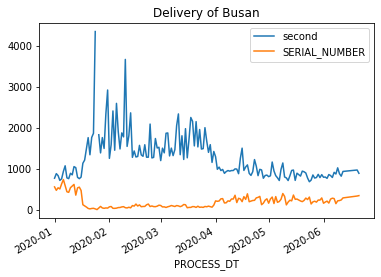

In [71]:
busan = pd.concat([group[:, '부산광역시'], c[:,'부산광역시']], axis=1)
busan.plot()
plt.title('Delivery of Busan')

Text(0.5, 1.0, 'Delivery of Gwangju')

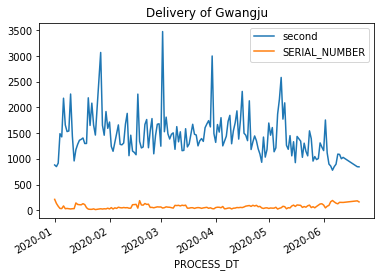

In [75]:
gwangju = pd.concat([group[:, '광주광역시'], c[:,'광주광역시']], axis=1)
gwangju.plot()
plt.title('Delivery of Gwangju')

Text(0.5, 1.0, 'Delivery of Daegu')

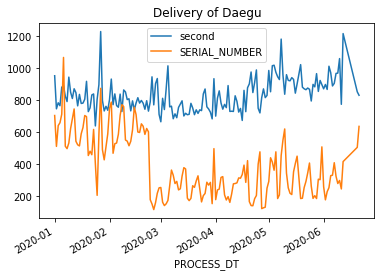

In [76]:
daegu = pd.concat([group[:, '대구광역시'], c[:, '대구광역시']], axis =1)
daegu.plot()
plt.title('Delivery of Daegu')

Text(0.5, 1.0, 'Delivery of Jeju-do')

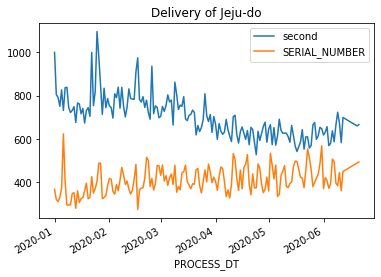

In [74]:
jeju = pd.concat([group[:, '제주특별자치도'], c[:,'제주특별자치도']], axis=1)
jeju.plot()
plt.title('Delivery of Jeju-do')

delivert completion time과 delivery amount의 상관계수(corr) 확인

In [64]:
seoul.corr()

,second,SERIAL_NUMBER
second,1.000000,0.312777
SERIAL_NUMBER,0.312777,1.000000


In [65]:
gyeonggido.corr()

,second,SERIAL_NUMBER
second,1.000000,0.083174
SERIAL_NUMBER,0.083174,1.000000


In [66]:
incheon.corr()

,second,SERIAL_NUMBER
second,1.000000,-0.311093
SERIAL_NUMBER,-0.311093,1.000000


In [77]:
gangwondo.corr()

,second,SERIAL_NUMBER
second,1.000000,-0.325081
SERIAL_NUMBER,-0.325081,1.000000


In [80]:
busan.corr()

,second,SERIAL_NUMBER
second,1.000000,-0.583513
SERIAL_NUMBER,-0.583513,1.000000


In [78]:
gwangju.corr()

,second,SERIAL_NUMBER
second,1.00000,-0.44942
SERIAL_NUMBER,-0.44942,1.00000


In [79]:
daegu.corr()

,second,SERIAL_NUMBER
second,1.000000,0.029323
SERIAL_NUMBER,0.029323,1.000000


In [81]:
jeju.corr()

,second,SERIAL_NUMBER
second,1.0000,-0.1934
SERIAL_NUMBER,-0.1934,1.0000
